# Visualization

## Topics
1. Matplotlib core framework
2. Pandas plot()
3. Seaborn statistical visualization
4. (not covered) Grammar of graphics (ggplot2 see plotnine )
5. (not covered) Interactive plotting

## Resources
1. Ch 9 in Python for Data Analysis, 2nd Ed, Wes McKinney (UCalgary library and https://github.com/wesm/pydata-book)
2. Ch 4 in Python Data Science Handbook, Jake VanderPlas (Ucalgary library and https://github.com/jakevdp/PythonDataScienceHandbook)
3. Fundamentals of Data Visualization, Claus O. Wilke (Ucalgary library and https://serialmentor.com/dataviz/index.html)
4. Overview by Jake VanderPlas https://www.youtube.com/watch?v=FytuB8nFHPQ


## Matplotlib
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
Matplotlib tries to make easy things easy and hard things possible.  
For simple plotting the pyplot module provides a MATLAB-like interface

https://matplotlib.org

Importing matplotlib looks like this

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### Two interfaces
There are two ways to interact with Matplot lib: a Matlab style and an object oriented style interface.

See Ch 4 in Python Data Science Handbook, Jake VanderPlas

- Two Interfaces for the Price of One, pp. 222
- Matplotlib Gotchas, pp. 232

### Matlab style interface

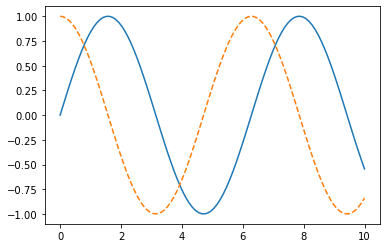

In [2]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Adding decorations to the plot is done by repeatatly calling functions on the imported `plt` module. All calls within the cell will be applied to the current figure and axes.

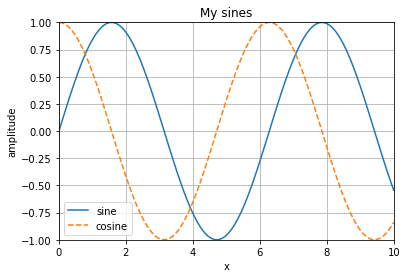

In [3]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label ='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

With this interface, you first create a figure and an axes object, then call their methods to change the plot.

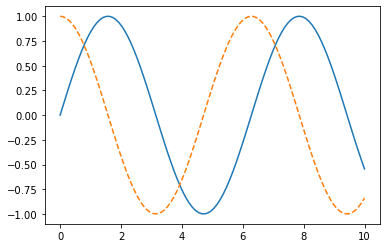

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

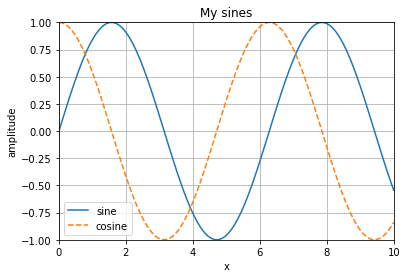

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 
With the figure object at hand, we can save to file

In [6]:
fig.savefig('sines.pdf')

In [7]:
!ls *.pdf

sines.pdf


## Plotting with pandas
> We use the standard convention for referencing the matplotlib API ...
> We provide the basics in pandas to easily create decent looking plots. 

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Let's load the wine dataset from https://archive.ics.uci.edu/ml/datasets/wine

In [6]:
import os
import requests

base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/"
file_names = ["wine.names", "wine.data"]

for file_name in file_names:
    if not os.path.isfile(file_name):
        print(f"Downloading {file_name} from {base_url}")
        response = requests.get(base_url+file_name)
        with open(file_name, 'wb') as f:
            f.write(response.content)
    else:
        print(f"{file_name} found on disk")

In [8]:
with open(file_names[1]) as f:
    for _ in range(10):
        print(f.readline(), end="")

1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045


In [9]:
with open(file_names[0]) as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [10]:
data = pd.read_csv('wine.data', 
                   header=None,
                  names=['class', 
                        'alcohol',
                         'malic_acid',
                         'ash',
                         'alcalinity_of_ash',  
                         'magnesium', 
                         'total_phenols',
                         'flavanoids',
                         'nonflavanoid_phenols',
                         'proanthocyanins',
                         'color_intensity',
                         'hue',
                         'OD280_OD315_of_diluted_wines',
                         'proline'  ])

In [11]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  proli

In [13]:
data.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Plotting all columns, works, but does not provide a lot of insight.

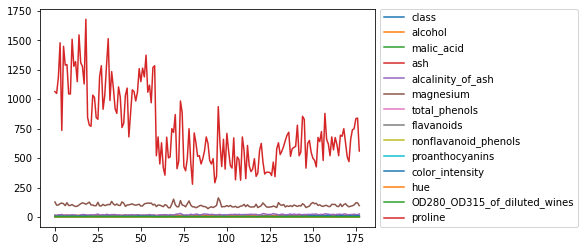

In [14]:
data.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Let's look at the distribution of `'class'` (a histogram)

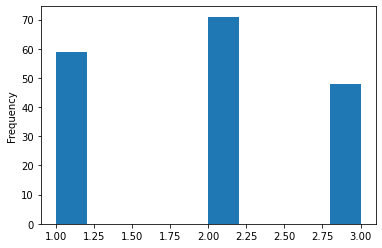

In [15]:
data['class'].plot.hist();

How many datapoints per class count?

In [12]:
data['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

Plotting histograms for each class side beside directly form the dataframe:

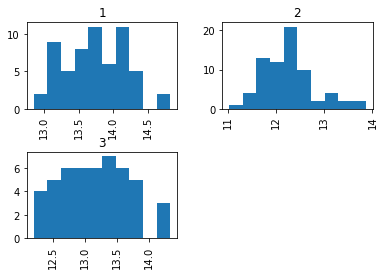

In [16]:
axs = data.hist(column='alcohol', by='class')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

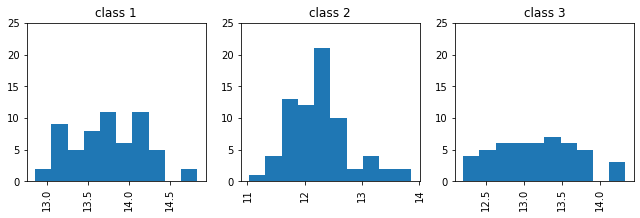

In [20]:
axs = data.hist(column='alcohol', by='class', layout=(1, 3), figsize=(9, 3))
for title, ax in zip(['class 1', 'class 2', 'class 3'], axs.reshape(-1)):
    ax.set(title=title, ylim=[0, 25])
plt.tight_layout() # adjust spacing after adding the title.

Is alcohol and color intensity correlated? Maybe it is different for different wines?  
Let's have a look with a scatter plot.

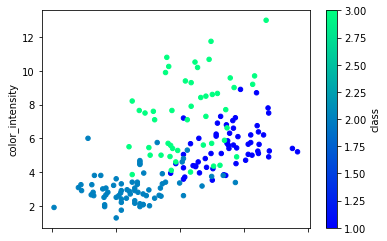

In [21]:
data.plot.scatter('alcohol', 'color_intensity', c='class', colormap='winter');

According to:  
https://stackoverflow.com/questions/43578976/pandas-missing-x-tick-labels

the missing x-labels are a pandas bug.

Workaraound is to create axes prior to calling plot

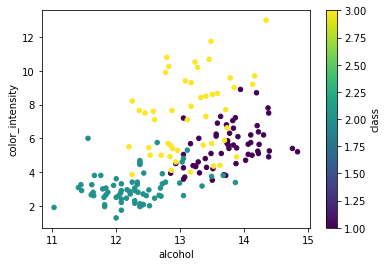

In [22]:
fig, ax = plt.subplots()
data.plot.scatter('alcohol', 'color_intensity', c='class', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know `'class'` is categorical.

One way to not get the colorbaris to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

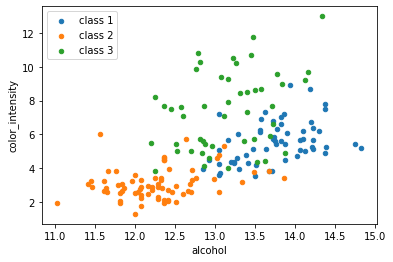

In [23]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='class'):
    if key in [1, 2, 3]:
        group.plot.scatter('alcohol', 'color_intensity', c=colors[key], label='class {}'.format(key), ax=ax);

Maybe using a categorical dtype helps:

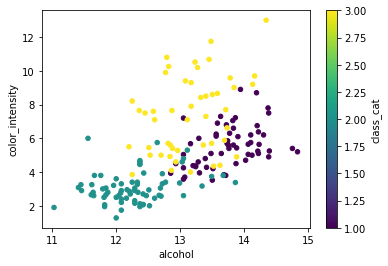

In [24]:
data['class_cat'] = pd.Categorical(data['class'], categories=[1, 2, 3], ordered=True)
fig, ax = plt.subplots()
data.plot.scatter('alcohol', 'color_intensity', c='class_cat', colormap='viridis', ax=ax);

No, unfortunately not.

## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [25]:
import seaborn as sns

Let's re-create the histograms by `'class'` with seaborn

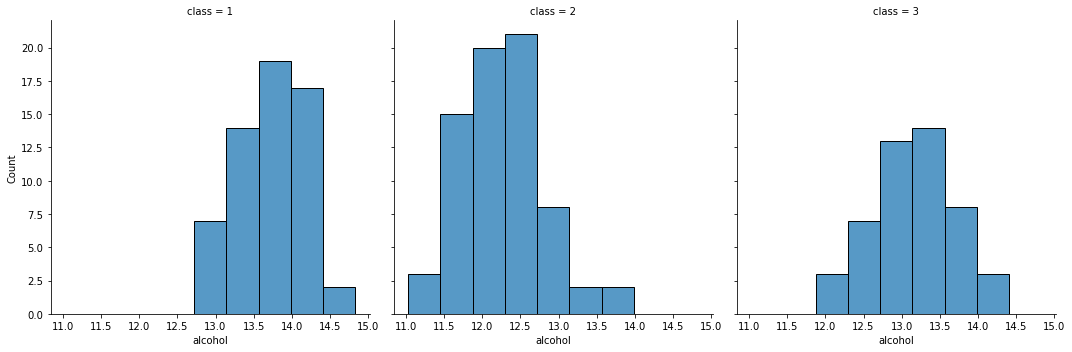

In [37]:
# Use class to split age into columns
sns.displot(x='alcohol', col='class', data=data);

We can display the counts in the same plot, one on top of the other.

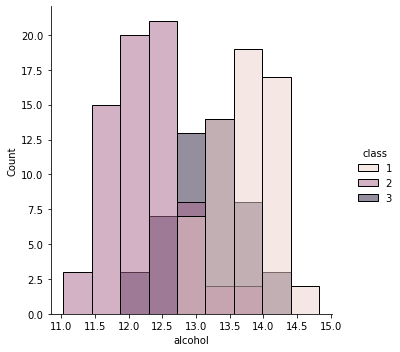

In [39]:
# Use class to split age into columns
sns.displot(x='alcohol', hue='class', data=data);

To have an idea of the split between classes, we can stack the counts, adding up to total.

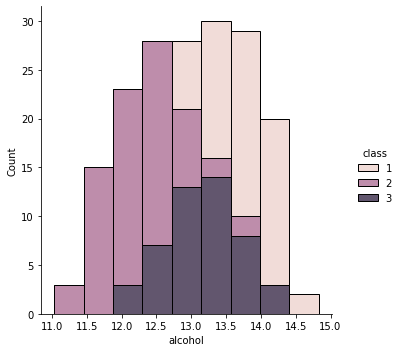

In [40]:
# Use class to split age into columns
sns.displot(x='alcohol', hue='class', data=data, multiple='stack');

We can look at the differences in alcohol with a boxplot too

<AxesSubplot:xlabel='class', ylabel='alcohol'>

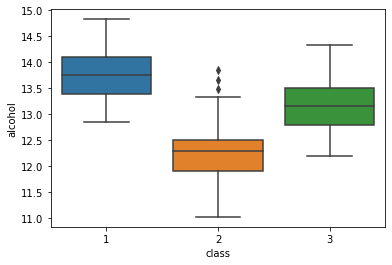

In [30]:
sns.boxplot(x='class', y='alcohol', data=data)

Let's re-create the scatter plot to see if alcohol and color intensity are correlated by class.

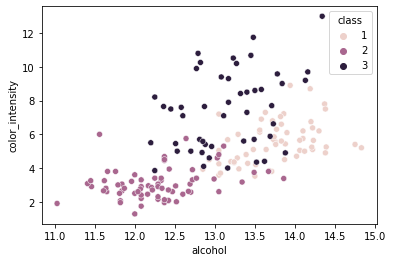

In [32]:
ax = sns.scatterplot(x='alcohol', y='color_intensity', data=data, hue='class')

Seaborn displays things differently for categorical features

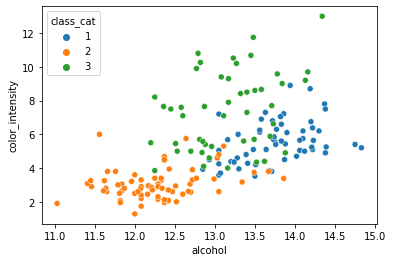

In [33]:
ax = sns.scatterplot(x='alcohol', y='color_intensity', data=data, hue='class_cat')

Adding a regression line helps with visualizing the relationship

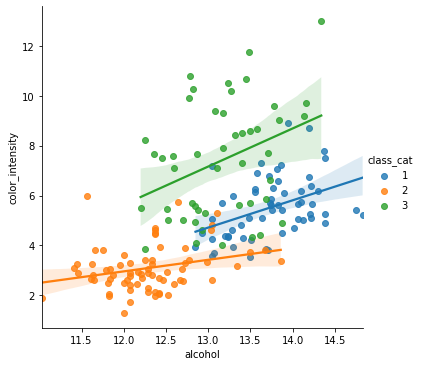

In [34]:
ax = sns.lmplot(x='alcohol', y='color_intensity', data=data, hue='class_cat')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

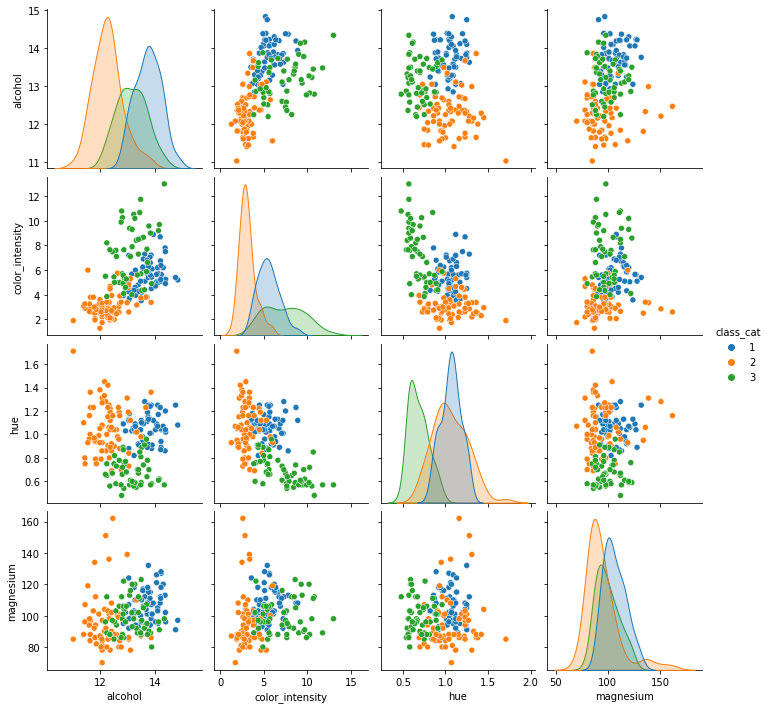

In [35]:
sns.pairplot(data, vars=['alcohol', 'color_intensity', 'hue', 'magnesium'], hue='class_cat')

As an alternative, we can visualize the correlation matrix as a heatmap

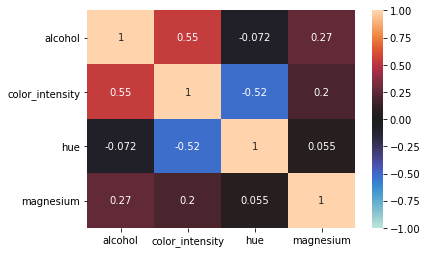

In [36]:
g = sns.heatmap(data[['alcohol', 'color_intensity', 'hue', 'magnesium']].corr(method='pearson'), 
            annot=True,
            vmin=-1, vmax=1,
               center=0)
# a little hack to get the top and bottom squares not to be cropped
# set y limits to be the same as x limits (in reverse order that 1's are on main diagonal)
g.set_ylim(g.get_xlim()[::-1]);

There are nice tutorials on the Seaborn website, be sure to check these out.